Задание 5. Линейное программирование. Графический метод

In [1]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
fr = lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) if '/' in x else float(x)
print('Введите числа a, b, c')
a = fr(input('a = '))
b = fr(input('b = '))
c = fr(input('c = '))

Введите числа a, b, c
a = -1
b = 6
c = 1/8


In [19]:
def func(xy):
    x, y = xy
    return -(x + a * y)

In [20]:
def gr(xy):
    x, y = xy
    der = np.zeros_like(xy)
    der[0] = -1
    der[1] = -a
    return der

In [21]:
#Вводим границы, если они есть
#Вводим ограничения
linear_constraints = [LinearConstraint([1, 2], -np.inf, 10),
                      LinearConstraint([3, 2], -np.inf, 18),
                      LinearConstraint([1, -1], -b, np.inf),
                      LinearConstraint([c, -1], -np.inf, 8*c + 3)]
x0 = np.array([1.0, 1.0])
res = minimize(func, x0, jac=gr, constraints=linear_constraints, options={'disp': True})
u = res.x[0]
v = res.x[1]
F_max = -res.fun
print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -11.000000000000462
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 5
[ 8. -3.]


In [22]:
print(f'Оптимальные значения: x = {u.round(3)}, y = {v.round(3)}')
print('Максимальное значение:',F_max.round(3))

Оптимальные значения: x = 8.0, y = -3.0
Максимальное значение: 11.0


In [26]:
x1 = np.linspace(-20, 20, 2000)
y1 = (10-x1)/2.0
y2 = (18-3*x1)/2.0
y3 = x1 + b
y4 = c*x1 - 8*c - 3
y5 = F_max/a - x1/a
y6 = 4/a - x1/a

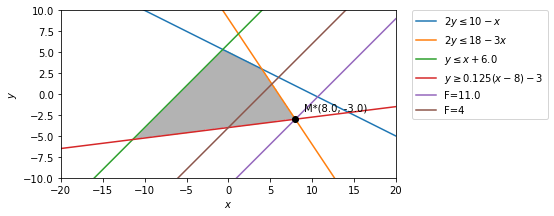

In [36]:
d = np.linspace(-20,20,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((2*y<=10-x) & (2*y<=18-3*x) & (y<=x+b) & (y>=c*x-8*c-3)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="gist_stern_r", alpha = 0.3);

plt.plot(x1, y1, label=r'$2y\leq 10-x$')
plt.plot(x1, y2, label=r'$2y\leq 18-3x$')
plt.plot(x1, y3, label=fr'$y\leq x + {b}$')
plt.plot(x1, y4, label=fr'$y\geq {c}(x-8)-3$')
plt.plot(x1, y5, label=f'F={F_max.round(3)}')
plt.plot(x1, y6, label='F=4')
plt.xlim(-20,20)
plt.ylim(-10,10)
plt.plot(u, v, 'ko')
plt.text(u + 1, v + 1, f'M*({u.round(3)}, {v.round(3)})')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()